In [81]:
import pandas as pd
import numpy as np
from cherenkovdeconvolution import util

#p.set_printoptions(threshold=np.inf)
#df = pd.read_csv('sample.csv')
df=pd.read_csv('sample.csv', nrows=1000000)
#print(df.head(8))
#X = df[['SplineMPEDirectHitsD.dir_track_length',
#'SPEFit2_HVFitParams.nmini'                       ,
#'LineFitGeoSplit2.zenith',
#   'SplineMPE.zenith'    ,
#     'SplineMPE.azimuth' 
#       'SPEFit2GeoSplit1BayesianFitParams.nmini',
#       'SPEFit2Bayesian.x',
#       'VariousVariables.Cone_Angle',
#       'SPEFit2TimeSplit1FitParams.logl',
#       'weight_honda_h4a']]
X = df[['SPEFit2Bayesian.x',
        'SPEFit2BayesianFitParams.nmini',
        'SPEFit2_HVFitParams.nmini',
        'SplineMPE.zenith',
        'SplineMPECharacteristicsIC.avg_dom_dist_q_tot_dom',
        'SplineMPEDirectHitsD.dir_track_length',
        'SplineMPEDirectHitsICB.n_early_strings',
        'SplineMPEDirectHitsICB.n_late_doms',
        'SplineMPEDirectHitsICD.n_dir_strings',
        'SplineMPEDirectHitsICE.n_late_strings',
        'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value']]

Y = df['MCPrimary.energy']
def rate_contr(contr):
    rating=0
    indices=[]
    contr_1st=contr.argsort()[:,-1]#returns indices of the highest value
    contr_2nd=contr.argsort()[:,-2]#return indices of the 2nd highest value
    contr_gap=contr_1st-contr_2nd#array of distances between the highest and 2nd highest bin
    for i in range(len(contr)):
        if contr_gap[i]>1:
            rating=rating+1
            indices.append(i)
        elif contr_gap[i]<(-1):
            rating=rating+1
            indices.append(i)
            
    return rating, indices     
#'Dustyness.n_doms_in_dust','BestTrackDirectHitsICC.n_early_strings',
binning_E = np.logspace(np.log10(Y.min()-10),
np.log10(Y.max()+100), 13)    # creating 12 bins for the energy 



#Binning overflow & underflow manually
#overflow = 1e10
#bins_over = np.append(binning_E,overflow)
#binning_E = bins_over

Y = np.digitize(Y, binning_E)  

Y = Y - 1

bin_1=[i for i in binning_E[:-1]]
bin_2=[i for i in binning_E[1:]]
bin_centers = np.mean([bin_1, bin_2], axis=0)
n_test = int(len(df)/10)

X_train = X.iloc[n_test:]#splitting the dataframe
Y_train = Y[n_test:]

X_test = X.iloc[:n_test]
Y_test = Y[:n_test]

f_true = util.fit_pdf(Y_test) 
f_true



array([2.5758e-01, 3.6933e-01, 2.1760e-01, 9.6360e-02, 3.7990e-02,
       1.3770e-02, 4.6200e-03, 1.8000e-03, 6.3000e-04, 2.4000e-04,
       5.0000e-05, 3.0000e-05])

In [40]:
from cherenkovdeconvolution import dsea
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import BernoulliNB #worse than gaussian
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import ExtraTreeClassifier # works extremly good on the data
#from sklearn.ensemble import RandomForestClassifier# super slow; about the same results as ExtraTree

f_est,contr = dsea(X_test, X_train, Y_train, GaussianNB(), K=3,return_contributions = True)
print('Chi square distance between f_est and f_true: {}'.format(util.chi2s(f_est, f_true)))

Chi square distance between f_est and f_true: 0.24776787086877494


(array([0.00059952, 0.02024503, 0.5001085 , 0.40318772, 0.05861266,
        0.01195331, 0.00177358, 0.00220296, 0.00054636, 0.00077037]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 [<matplotlib.patches.Polygon at 0x7ff095689730>])

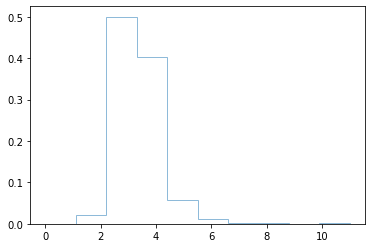

In [37]:
plt.hist(range(12), weights = contr[0], alpha = 0.5, histtype = 'step')

In [85]:
rate_contr(contr)


(2107,
 [120,
  190,
  235,
  343,
  465,
  468,
  478,
  520,
  568,
  598,
  623,
  627,
  745,
  762,
  816,
  834,
  873,
  931,
  943,
  965,
  1088,
  1123,
  1133,
  1148,
  1237,
  1343,
  1352,
  1426,
  1458,
  1504,
  1643,
  1711,
  1781,
  1842,
  1853,
  1911,
  1948,
  2048,
  2140,
  2166,
  2198,
  2227,
  2233,
  2267,
  2308,
  2314,
  2352,
  2386,
  2402,
  2501,
  2563,
  2579,
  2655,
  2669,
  2768,
  2769,
  2800,
  2848,
  2898,
  2950,
  2978,
  2991,
  3087,
  3195,
  3221,
  3255,
  3417,
  3438,
  3481,
  3660,
  3693,
  3768,
  3841,
  3847,
  3894,
  3978,
  3996,
  4059,
  4143,
  4189,
  4226,
  4247,
  4251,
  4253,
  4302,
  4365,
  4478,
  4480,
  4595,
  4598,
  4613,
  4641,
  4666,
  4684,
  4711,
  4747,
  4835,
  4896,
  4931,
  4953,
  4961,
  5031,
  5087,
  5166,
  5222,
  5248,
  5272,
  5286,
  5319,
  5323,
  5329,
  5339,
  5453,
  5465,
  5468,
  5474,
  5494,
  5573,
  5578,
  5624,
  5641,
  5754,
  5868,
  5929,
  6001,
  6078,
  614

In [ ]:
plt.hist(range(12), weights = contr[0], alpha = 0.5, histtype = 'step')

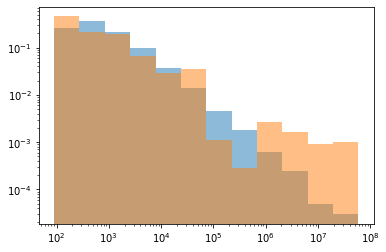

In [50]:
from matplotlib import pyplot as plt
#plt.hist(range(12), weights = f_true, alpha = 0.5)
#plt.hist(range(12), weights = f_est, alpha = 0.5)
plt.hist(bin_centers, bins = binning_E, weights = f_true, log = True, alpha= 0.5, label = 'DSEA estimate')
plt.hist(bin_centers, bins = binning_E, weights = f_est, log = True, alpha= 0.5, label = 'DSEA estimate')
plt.gca().set_xscale('log')
plt.yscale('log')
plt.show()

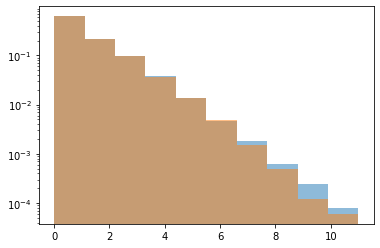

In [20]:
from matplotlib import pyplot as plt
from cherenkovdeconvolution import dsea
from sklearn.tree import ExtraTreeClassifier

f_est2, contr = dsea(X_test, X_train, Y_train, ExtraTreeClassifier(),fixweighting = False, K = 3,return_contributions = True)
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_est2, alpha = 0.5)

plt.yscale('log')
plt.show()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 [<matplotlib.patches.Polygon at 0x7ff09cd26970>])

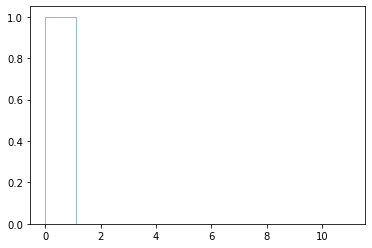

In [17]:
plt.hist(range(12), weights = contr[12], alpha = 0.5, histtype = 'step')


In [25]:
for i in range(0,12):
    print(contr[i])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


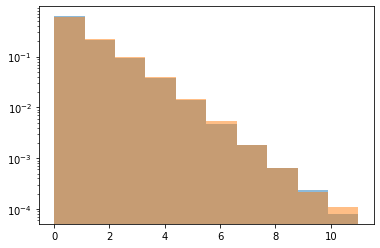

In [6]:
from cherenkovdeconvolution import dsea
from sklearn.ensemble import RandomForestClassifier
f_est3, contr = dsea(X_test, X_train, Y_train,RandomForestClassifier(), K=3, return_contributions = True)
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_est3, alpha = 0.5)
plt.yscale('log')
plt.show()

In [33]:
for i in range(0,12):
    print(contr[i])

[1.92015676e-14 5.99524650e-04 2.02450257e-02 5.00108499e-01
 4.03187720e-01 5.86126603e-02 1.19533086e-02 1.77357608e-03
 2.20296305e-03 5.46356113e-04 2.50158245e-04 5.20207776e-04]
[9.78176001e-01 1.76205912e-02 3.82933275e-03 2.98738005e-04
 4.24972812e-05 3.22462192e-05 1.85763972e-07 1.82753865e-08
 2.44217696e-07 6.07331079e-08 1.21100177e-08 7.21150682e-08]
[5.81103465e-02 6.22058094e-01 2.96116577e-01 2.07303377e-02
 1.99446017e-03 9.80473258e-04 4.26034556e-06 3.43339405e-07
 3.72570144e-06 5.42833147e-07 9.38283159e-08 7.44798126e-07]
[1.16591575e-02 6.38834950e-01 3.26692329e-01 2.05594208e-02
 1.62113775e-03 6.28530214e-04 2.50599132e-06 1.44025421e-07
 1.44714038e-06 1.38561265e-07 2.57239522e-08 2.13083836e-07]
[9.85059936e-01 1.39247716e-02 9.79319592e-04 3.34315373e-05
 1.86695092e-06 6.68180420e-07 2.92331521e-09 2.12872914e-10
 1.46583583e-09 1.56952238e-10 5.91616749e-11 8.41291648e-10]
[3.20706205e-01 4.49960900e-01 2.06734317e-01 1.85512466e-02
 2.49172733e-03 1.5

(array([6.13275833e-01, 3.60362174e-01, 2.34128359e-02, 2.02662352e-03,
        9.11681249e-04, 4.06581182e-06, 3.15173321e-07, 4.05946909e-06,
        5.96055294e-07, 1.81552873e-06]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 [<matplotlib.patches.Polygon at 0x7ff0956c4fa0>])

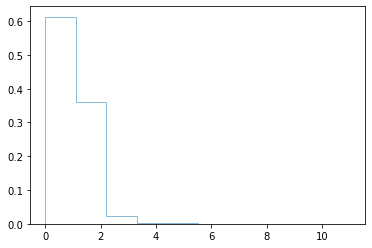

In [34]:
plt.hist(range(12), weights = contr[12], alpha = 0.5, histtype = 'step')


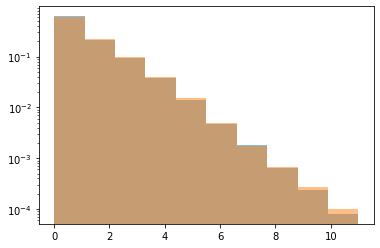

In [7]:
from cherenkovdeconvolution import dsea
from sklearn.tree import DecisionTreeClassifier
f_est4 = dsea(X_test, X_train, Y_train,DecisionTreeClassifier(), K=3) 
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_est4, alpha = 0.5)
plt.yscale('log')
plt.show()

0
1
2
3


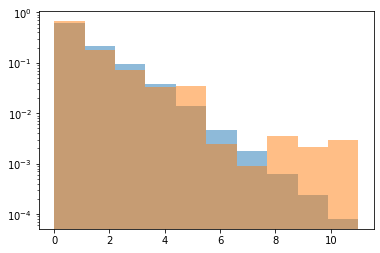

In [10]:
import cherenkovdeconvolution.stepsize as stepsize

# first of all, we set up an inspection function, which prints the step size of each iteration
def inspect_alpha(k, alpha, chi2s, f): # you can define custom inspection methods to investigate DSEA
    print(alpha)

# There are two decay rates, the first of which is comparably slow
alpha_mul = stepsize.decay_mul(0.5)
f_est_mul = dsea(X_test, X_train, Y_train, GaussianNB(), K = 3, inspect = inspect_alpha, alpha = alpha_mul)
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_est_mul, alpha = 0.5)
plt.yscale('log')
plt.show()

0
1
2


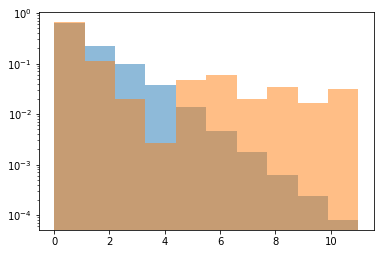

In [13]:
alpha_exp = stepsize.decay_exp(0.5, 2.0) # start with step size 2
f_est_exp = dsea(X_test, X_train, Y_train, GaussianNB(), K = 3, inspect = inspect_alpha,  alpha = alpha_exp)
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_est_exp, alpha = 0.5)
plt.yscale('log')
plt.show()

In [27]:
from cherenkovdeconvolution.discretize import TreeDiscretizer
discretizer = TreeDiscretizer(X_train, Y_train, 4)
x_data  = discretizer.discretize(X_test)
x_train = discretizer.discretize(X_train)
alpha = stepsize.alpha_adaptive_run(x_data, x_train, Y_train, tau = 0, bins_y = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

# inspect the chosen alpha values with a callback function
def inspect_alpha(f, k, a, chi2s): # this signature is mandatory. Here, f is the latest estimate.
    print('Iteration {}: alpha = {}'.format(k, a)) # print iteration number and alpha value
# deconvolve
f_est = dsea(X_test, X_train, Y_train, GaussianNB(), K = 3, alpha = alpha,inspect = inspect_alpha)
print('Chi square distance between f_est and f_true: {}'.format(util.chi2s(f_est, f_true)))
f_est

Iteration 0: alpha = nan
Iteration 1: alpha = 0.9988924213528076
Iteration 2: alpha = 5.663671779334335e-14
Iteration 3: alpha = 4.9999644209182255e-14
Chi square distance between f_est and f_true: 0.22142138938142164


array([0.41099392, 0.22127159, 0.16646245, 0.0853378 , 0.04667541,
       0.03840207, 0.00767099, 0.00349916, 0.00720699, 0.00459314,
       0.00350665, 0.00437982])

/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


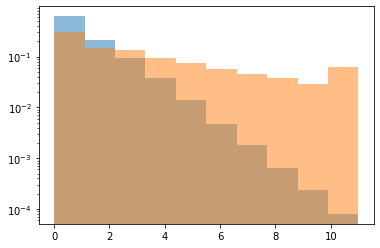

In [32]:
from sklearn.linear_model import LogisticRegression

f_logi = dsea(X_test, X_train, Y_train,LogisticRegression(), K=1) 
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_logi, alpha = 0.5)
plt.yscale('log')
plt.show()

In [7]:
from cherenkovdeconvolution import dsea
from sklearn.linear_model import LogisticRegression

f_multi = dsea(X_test, X_train, Y_train,LogisticRegression(solver='saga',multi_class='multinomial',max_iter=10000), K=3)
f_multi

array([0.05834189, 0.0796879 , 0.09175746, 0.09737599, 0.10063295,
       0.09989575, 0.0956372 , 0.09148121, 0.08473384, 0.07363908,
       0.06470635, 0.06211038])

In [8]:
from mord import LogisticSE
from cherenkovdeconvolution import dsea

f_ord=dsea(X_test, X_train, Y_train,LogisticSE(alpha=1.), K = 3)
f_ord

array([4.04024442e-03, 5.82009535e-02, 2.98888201e-01, 4.06214189e-01,
       1.78398832e-01, 4.42148696e-02, 8.21392319e-03, 1.44996711e-03,
       3.01953052e-04, 6.46942031e-05, 1.16346633e-05, 5.39056535e-07])

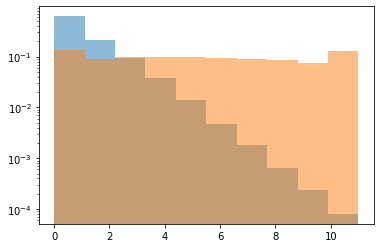

In [12]:
from matplotlib import pyplot as plt
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_multi, alpha = 0.5)
plt.yscale('log')
plt.show()


In [13]:
print('Chi square distance between f_est and f_true: {}'.format(util.chi2s(f_multi, f_true)))

Chi square distance between f_est and f_true: 1.8169194441082137


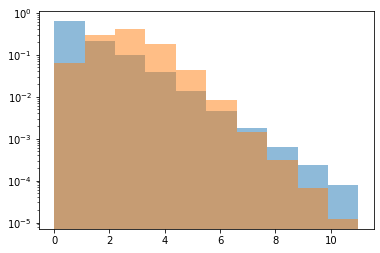

Chi square distance between f_est and f_true: 1.5687256585874765


In [15]:
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_ord, alpha = 0.5)
plt.yscale('log')
plt.show()
print('Chi square distance between f_est and f_true: {}'.format(util.chi2s(f_ord, f_true)))